<a href="https://colab.research.google.com/github/tanyarw/automatic-segmentation-fruits/blob/main/count_fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Count number of fruits from an image**

In harvesting of fruits, it is a tedious task to manually count and analyse fruits. Image processing techniques can be used to mask out the fruits from the plants. This minimises the manual labour and effort to analyse and recognise ripened fruits on plants.  

![flowchart](flowchart.jpg "Flowchart")

## Input
Read the image

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('../fix/dataset-primer/1.png')
#show the image
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow("s", im_rgb)   
# plt.imshow(im_rgb), plt.grid(False)
# plt.xticks([]), plt.yticks([])

## Grayscale
Convert the image to grayscale. The colour of fruits makes them a lighter shade than the background leaves, making it easier to detect.

(([], []), ([], []))

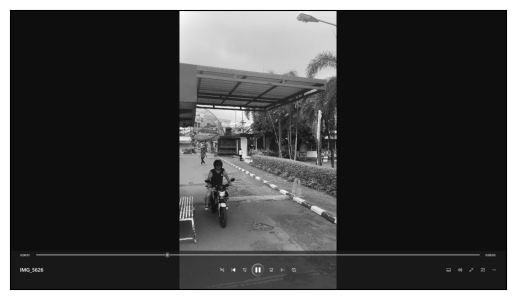

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## Gaussian filter
Remove noise from image and reduce contrast, otherwise the leaves will be highlighted more if there is more contrast. Use gaussian filter for the same.

(([], []), ([], []))

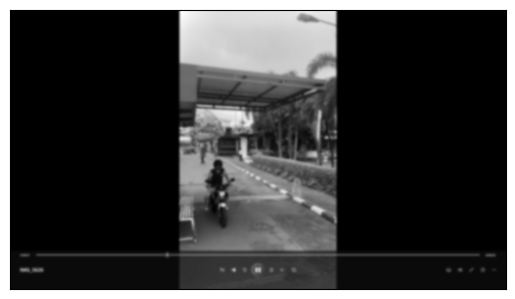

In [4]:
blur = cv2.GaussianBlur(gray,(25,25),0)
plt.imshow(blur, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

# metode 1
dengan watershed

In [5]:
# brightness = -140
# contrast = 90
# # tmp = np.int16(blur)
# tmp = tmp * (contrast/127+1) - contrast + brightness
# tmp = np.clip(tmp, 0, 255)
# adjusted = np.uint8(tmp)
# plt.imshow(adjusted, cmap='gray'), plt.grid(False)
# plt.xticks([]), plt.yticks([])

(([], []), ([], []))

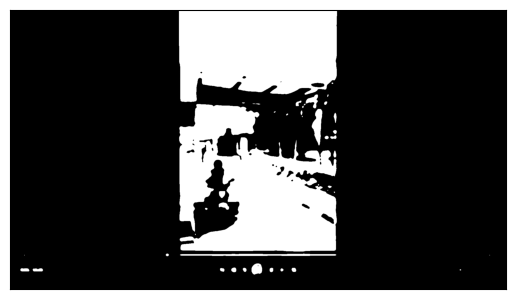

In [6]:
#threshold
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

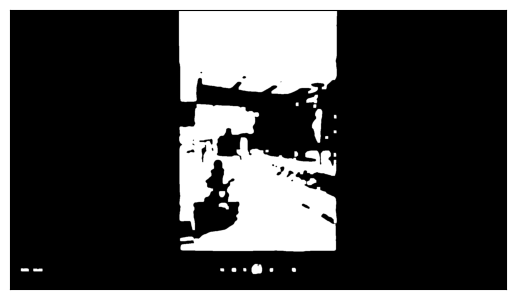

In [7]:
# noise removal
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

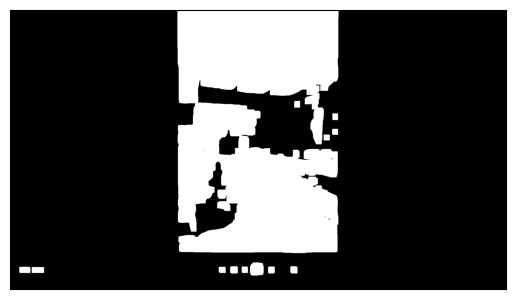

In [8]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

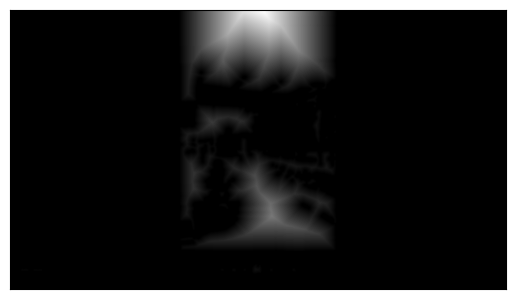

In [9]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
plt.imshow(dist_transform, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

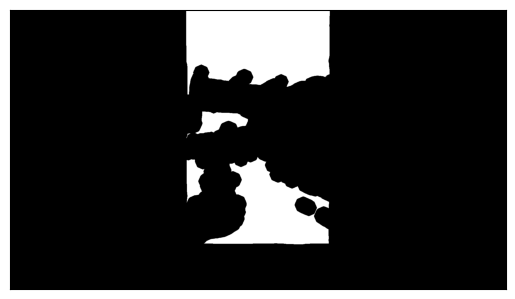

In [10]:
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

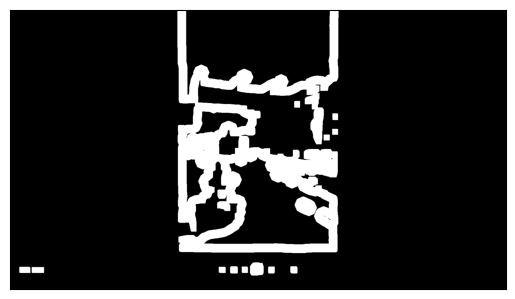

In [11]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

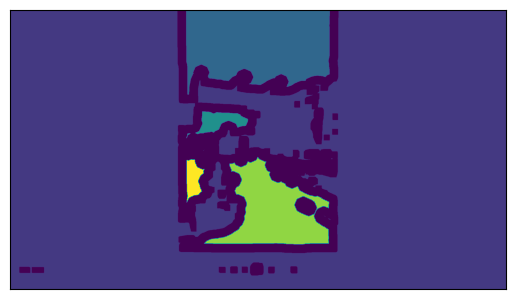

In [12]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers), plt.grid(False)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

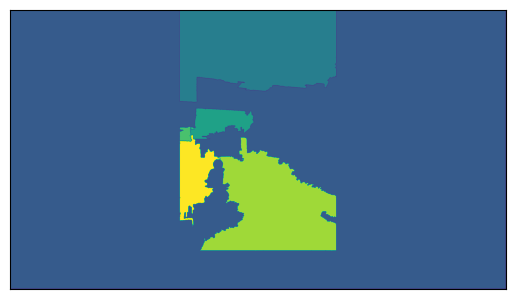

In [13]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers), plt.grid(False)
plt.xticks([]), plt.yticks([])

jumlah buah: 5


(([], []), ([], []))

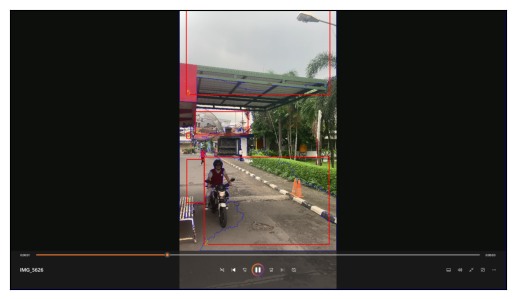

In [14]:
new_img = img.copy()
conts,h=cv2.findContours(sure_fg.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
number_of_objects_in_image= len(conts)
print("jumlah buah: "+str(number_of_objects_in_image))
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(new_img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,255))
# show the image
im_rgb = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb), plt.grid(False)
plt.xticks([]), plt.yticks([])

# metode 2
## K-means clustering
Apply k-means clustering to split the image into 6 regions depending on pixel values. This will smoothen the textures in the image and help us choose a common region in the image that belong only to the fruits (region segmentation).

(([], []), ([], []))

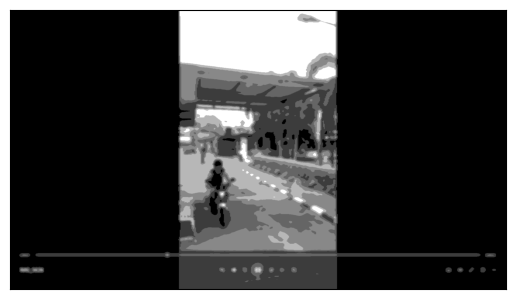

In [15]:
# convert the image to a 2D array of pixels
pixel_values = blur.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6 # number of clusters k

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(blur.shape)

# show the image
plt.imshow(segmented_image, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## Threshold
Apply binary thresholding to the image and select the brightest pixels. Here the region selected lies above 165 pixels (region segmentation).

(([], []), ([], []))

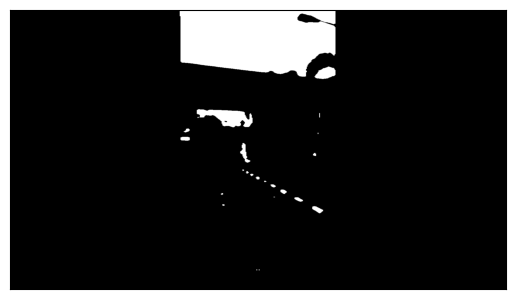

In [16]:
_, thresh = cv2.threshold(segmented_image, 165, 255, 0)
# show the image
plt.imshow(thresh, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## Canny Edge Detection
Perform canny edge detection. This will give us the boundaries, to later help accurately plot and detect the contour lines (edge segmentation).

(([], []), ([], []))

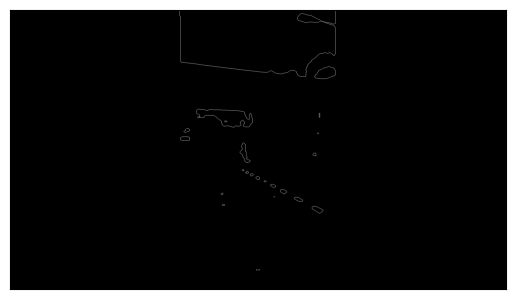

In [17]:
edges = cv2.Canny(thresh,120,200)
# show the image
plt.imshow(edges, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## Closing
Perform a closing operation (dilation followed by erosion) on the given image. This will help us join the broken cracks together.

(([], []), ([], []))

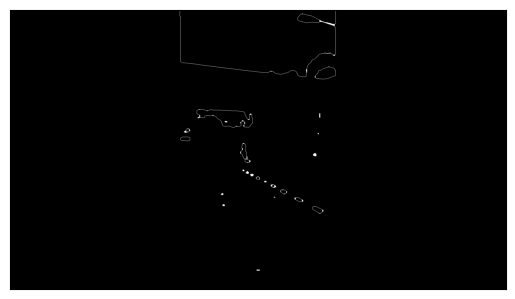

In [18]:
kernelClose=np.ones((8,8))
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernelClose)
# show the image
plt.imshow(closing, cmap='binary_r'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## Output
Find the contours in the segmented image. Plot the detected fruits and count them.

(([], []), ([], []))

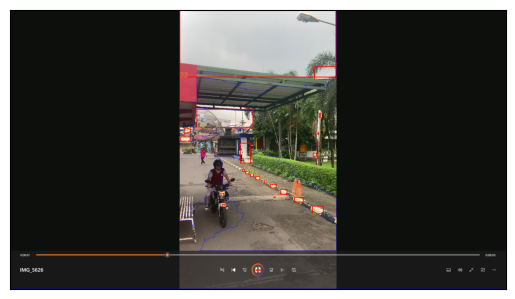

In [19]:
new_img = img.copy()
conts,h=cv2.findContours(closing.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(new_img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,255))
# show the image
im_rgb = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb), plt.grid(False)
plt.xticks([]), plt.yticks([])